In [5]:
import yfinance
import pandas as pd
import numpy as np

In [6]:
FROM_DATE = '2023-01-01'
TO_DATE = '2025-05-01'

In [7]:
# Get volatility data for the ftse100 index
ftse100 = yfinance.Ticker("^FTSE")
ftse100_data = ftse100.history(
    start=FROM_DATE,
    end=TO_DATE,
    interval="1d",
    actions=False,
    auto_adjust=True,
    prepost=False,
    proxy=None
)
ftse100_data = ftse100_data[["Close"]]
ftse100_data["Returns"] = ftse100_data["Close"].pct_change()
ftse100_data["Volatility"] = ftse100_data["Returns"].rolling(window=21).std() * np.sqrt(252)
ftse100_data = ftse100_data.dropna()

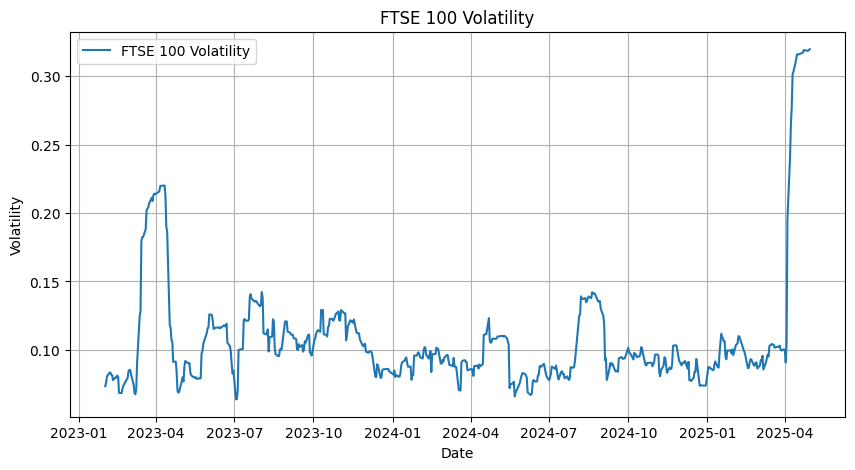

In [8]:
# Plot the volatility data
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(ftse100_data.index, ftse100_data["Volatility"], label="FTSE 100 Volatility")
plt.title("FTSE 100 Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.grid()
plt.show()

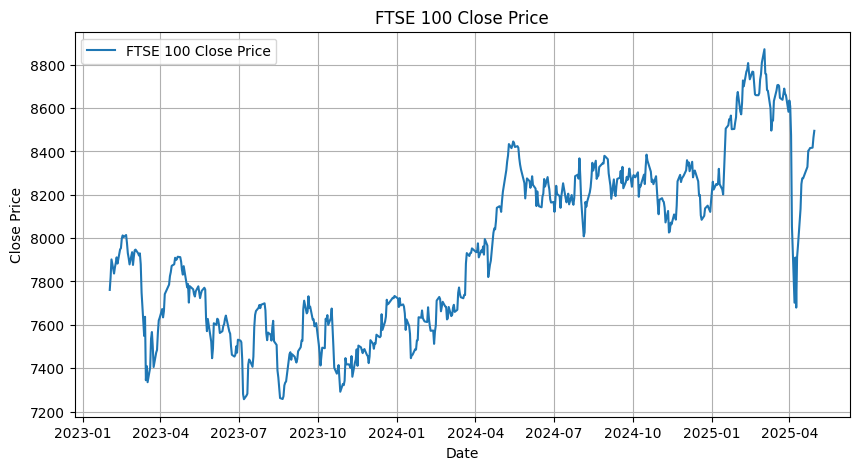

In [9]:
# Plot close prices
plt.figure(figsize=(10, 5))
plt.plot(ftse100_data.index, ftse100_data["Close"], label="FTSE 100 Close Price")
plt.title("FTSE 100 Close Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid()
plt.show()